HW task
please send it to daschapopowa@gmail.com

1)Choose a long text (a novel), do preprocessing on it (delete punctuation, lemmatize it) -- 2 points

2) Train a word2vec model on the chosen text, set the parameters (window size, vector size, number of iterations etc.), comment on your choice of parameter settings and the reasoning behind it -- 3 points (1 point for the model, 2 points for the comments)

3) Test your model, use most_similar, similarity, doesnt_match functions, comment on the model performance -- 3 points (1 point for the use of the functions, 2 points for the comments and reasoning behind the testing)

4) Visualize the results of the training and testing (one plot or one graph), comment on the visualization -- 2 points (1 point for the plot/graph, 1 point for the commentary)

You can work on this assignment in pairs, if you choose to do so, create two models with different parameter settings, compare the results (which model was more successful and why?) and two visualizations (two plots or two graphs or a plot and a graph)

#1 **Choose a long text (a novel), do preprocessing on it (delete punctuation, lemmatize it)**

In [ ]:
!pip install gensim

In [1]:
#first I import packs
import re
import gensim
import logging
import nltk.data
import pandas as pd
import urllib.request
from bs4 import BeautifulSoup
from nltk.corpus import stopwords
from gensim.models import word2vec

import warnings
warnings.filterwarnings('ignore')

import tqdm
import pymystem3


In [2]:
from tqdm import tqdm
from pymystem3 import Mystem
import nltk
nltk.download('stopwords')
m = Mystem()
sw = stopwords.words('russian')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Sarah\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [3]:
from string import punctuation

In [4]:
#the code is close to that was given to us, 
#but I decided to remove numerals from the text, to do so nu_m is created

with open('tri_kontsa.txt', 'r', encoding='utf8') as f:
    text = f.readlines()

new_lines = []
nu_m = {'1', '2', '3', '4','5', '6', '8', '9', '0', 'I','V','X'}

for line in tqdm(text):
    line = ' '.join([w for w in line.split() if w not in sw if w[-1] not in nu_m])
    newline = ''.join(m.lemmatize(line))
    new_lines.append(newline)
        
with open('tri_kontsa_lem.txt', 'w', encoding='utf8') as f1:
    for line in new_lines:
        f1.write(line)

# to erase punctuation - works       
with open('tri_kontsa_lem.txt', 'r', encoding='utf8') as text_lem:
    text_one = text_lem.read()
    words_text_one = text_one.strip().split()
    twords = [word.strip(punctuation) for word in words_text_one] 
    text_joint = ' '.join(twords)
    #print (text_joint)

#to save the result as a file - works
with open('tri_kontsa_lem_tok.txt', 'w', encoding='utf8') as f2:
    for elements in text_joint:
        f2.write(elements)

100%|████████████████████████████████████████████████████████████████████████████| 3730/3730 [1:51:10<00:00,  1.79s/it]


#2 **Train a word2vec model on the chosen text, set the parameters (window size, vector size, number of iterations etc.), comment on your choice of parameter settings and the reasoning behind it**

In [5]:
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

In [6]:
f = 'tri_kontsa_lem_tok.txt'
data = gensim.models.word2vec.LineSentence(f)

In [7]:
%time model_tri_kontsa_lem_tok = gensim.models.Word2Vec(data, size=300, window=5, min_count=1, iter=100)
#comment
# size=200 as it is assumed to be a goldem middle between 100 and 300 which are usually used 
# window=5 as I am planning to study semantics
# min_count=1 as Mamin-Sibiruak is well-known for the use of unique very rare dialect words,
# which may occur in the novel only once but may be important
# iter=100, in order to get a better picture in the end

2020-10-07 16:43:28,141 : INFO : collecting all words and their counts
2020-10-07 16:43:29,178 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2020-10-07 16:43:29,215 : INFO : collected 11203 word types from a corpus of 83417 raw words and 9 sentences
2020-10-07 16:43:29,241 : INFO : Loading a fresh vocabulary
2020-10-07 16:43:30,113 : INFO : effective_min_count=1 retains 11203 unique words (100% of original 11203, drops 0)
2020-10-07 16:43:30,115 : INFO : effective_min_count=1 leaves 83417 word corpus (100% of original 83417, drops 0)
2020-10-07 16:43:30,288 : INFO : deleting the raw counts dictionary of 11203 items
2020-10-07 16:43:31,321 : INFO : sample=0.001 downsamples 31 most-common words
2020-10-07 16:43:31,328 : INFO : downsampling leaves estimated 80596 word corpus (96.6% of prior 83417)
2020-10-07 16:43:31,465 : INFO : estimated required memory for 11203 words and 300 dimensions: 32488700 bytes
2020-10-07 16:43:31,469 : INFO : resetting layer weight

Wall time: 29.9 s


#3 **Test your model, use most_similar, similarity, doesnt_match functions, comment on the model performance***

In [18]:
#3.1. most_similar
model_tri_kontsa_lem_tok.wv.most_similar("мочеган", topn=3)
#the Model showed that the most close words for "мочеган" is "обушник" which is fine, 
#because these are words for newly settled workers

[('обушник', 0.5507122874259949),
 ('задумывать', 0.5132108926773071),
 ('срастаться', 0.4778026342391968)]

In [19]:
#3.1.most_similar
model_tri_kontsa_lem_tok.wv.most_similar(positive=["папа", "мать"], negative=["отец"], topn=3)
# There are words "отец", "папа", "мать" but no "мама" in the novel, so I was curious to know what staads fot 'mommy'
# the model showed that the word "хозяйка" is as close to "мать" as "папа" to "отец". 
# the model works, but maybe I wanted a different result

[('хозяйка', 0.3927587568759918),
 ('езжать', 0.38343891501426697),
 ('высылаться', 0.38176822662353516)]

In [26]:
#3.2. similarity
model_tri_kontsa_lem_tok.wv.similarity("самойло", "евтихыч")
#there are the first and father's names of the same person, 
#so it is interesting to see how often they occur together
#The model says, that these words are similar to 59% which is a good result

0.5961419

In [30]:
#3.3.doesnt_match
model_tri_kontsa_lem_tok.wv.doesnt_match("мочеган поселенец таисья раскольничий жигаль обушник".split())
# these are a list a synonyms and one femele name, the model shall choose it and throw it away. 
#And it did so! So, the model works

'таисья'

#4**Visualize the results of the training and testing (one plot or one graph), comment on the visualization -- 2 points (1 point for the plot/graph, 1 point for the commentary)**

In [31]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
%matplotlib inline

In [52]:
words = ['мочеган', 'поселенец', 'хрестьянин', 'керженец','таисья', 'раскольничий', 'жигаль' , 'обушник']

In [53]:
#To check is words are there in the text
for word in words:
    # is the word present in the model?
    if word in model_tri_kontsa_lem_tok:
        print(word)
        # looking at the first 10 numbers from the embedding 
        print(model_tri_kontsa_lem_tok[word][:10])
        # getting 10 neighbours
        for i in model_tri_kontsa_lem_tok.most_similar(positive=[word], topn=10):
            # word + cosine similarity
            print(i[0], i[1])
        print('\n')
    else:
        # Oops!
        print('Oops, the word "%s" is not in the model!' % word)

мочеган
[ 0.05051124  0.68227     0.21640322  0.07587114  0.4260598  -0.59664226
  0.7691969   0.6085675  -0.58376515 -0.06567628]
обушник 0.5507122874259949
задумывать 0.5132108926773071
срастаться 0.4778026342391968
заодно 0.4562418460845947
зоставаться 0.4535093307495117
ключевлянин 0.45122402906417847
роблять 0.4472018778324127
хрестьянин 0.4412477910518646
подучать 0.43600088357925415
спор 0.43248450756073


поселенец
[-0.17723006 -0.23354459 -0.02832366 -0.04665114  0.03963758  0.02274213
 -0.31146705  0.11395568  0.04380999  0.03639428]
понастроить 0.5730077624320984
култым 0.5651876926422119
беглый 0.5117446184158325
ослобонить 0.5013827681541443
разлагаться 0.4949084222316742
виновный 0.49330759048461914
проникать 0.488969624042511
углядеть 0.4881848990917206
выдача 0.48480039834976196
египет 0.48209813237190247


хрестьянин
[-0.01809653 -0.0319659  -0.06523009 -0.35741216 -0.45593432  0.28780335
  0.07239077  0.4174329  -0.1321576   0.23635466]
приколачивать 0.620668768882751

In [54]:
X = model_tri_kontsa_lem_tok[words]

In [57]:
pca = PCA(n_components=2)
coords = pca.fit_transform(X)

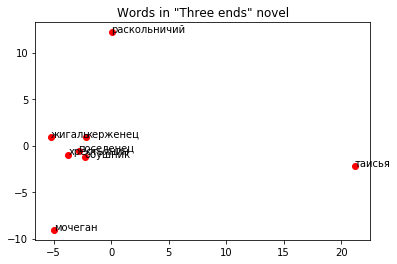

In [60]:
plt.scatter(coords[:, 0], coords[:, 1], color='red')
plt.title('Words in "Three ends" novel')

for i, word in enumerate(words):
    plt.annotate(word, xy=(coords[i, 0], coords[i, 1]))
plt.show()

Comment in #4: the plot shows that among semantically synonous words some are closer, some are more distincs. So, the word "раскольничий" which is used in the book both for coding 'a new worker in the settlement' and 'ex-convict' is far from other words with the meaning 'worker', but not that far as the word "таисья", a female character who is not a worker. 
It is interesting, that the word for workers of a nearby village (мочегане) is also far from the synonyms. 
I hope that it proves that the model works.
